In [13]:
homeDir = 'P:\\PW-WATER SERVICES\\TECHNICAL SERVICES\\Anna\\Storm Analysis'
testFile = homeDir + '\\FlowData_20181110_20181116\\BC70A_29907417.csv'
hourlyFile = homeDir + 'rgHourly_20180101-20180331.txt'
dailyFile = homeDir + 'rgDaily_20170101-20181231.txt'

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def reorganizeFlowData(df,colVal):
    df['date']=df.index.date
    df['time']=df.index.time
    df = df.pivot(index='time',columns='date',values=colVal)
    return(df)

def readRaintxt(filename,useColList):
    df = pd.read_csv(filename,sep='\t',usecols=useColList,index_col=0)
    df.index = pd.to_datetime(df.index)
    return(df)

def readSliicercsv(filename):
    df = pd.read_csv(filename,index_col = 0,header=2,usecols=[0,1,2,3,4],names=['Datetime','sdepth (in)','y (in)','v (ft/s)','Q (MGD)'])
    df.index = pd.to_datetime(df.index)
    return(df)

In [109]:
df = readSliicercsv(testFile)
df = reorganizeFlowData(df=df,colVal='Q (MGD)')
df.columns

Index([2018-11-10, 2018-11-11, 2018-11-12, 2018-11-13, 2018-11-14, 2018-11-15,
       2018-11-16],
      dtype='object', name='date')

In [171]:
# create data labels
# create data frame of dates from the original dataframe columns
df2 = pd.DataFrame({'original': df.columns})
# convert from string into datetime
df2['original']=pd.to_datetime(df2.original)
# set a column for the labels to the day value as a string
df2['label']=df2['original'].dt.strftime('%d')
# set column for day of week
df2['dayofweek']=df2['original'].dt.weekday
# create a separate column that has the day as an integer
df2['dayonly']=df2['original'].dt.day
# find the first day of each month and set it to format Jan 1, Feb 1, etc.
mask = df2['dayonly']<11
df2.loc[mask,'label'] = df2.loc[mask,'original'].dt.strftime('%b %d')
#set label colors
wkdColor = 'xkcd:charcoal'
wkeColor = 'xkcd:grey'
mask = df2['dayofweek']>4
df2['labelcolor'] = wkdColor
df2.loc[mask,'labelcolor']=wkeColor
df2['rain'] = [0,0,3.82,0.21,0.81,0.7,0]

weekendIndx = df2.index[df2['dayofweek']>4].tolist()
rainIndx = df2.index[df2['rain']>0.5].tolist()
rainIndx

weekendIndx

[0, 1]

In [190]:
list(df2.labelcolor.values)
top = df.max().max()


53.0

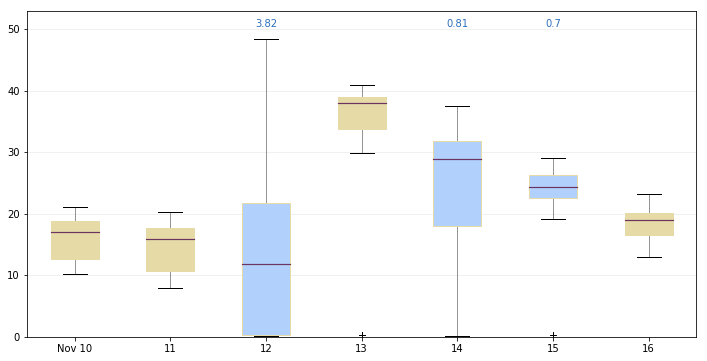

In [198]:
import numpy as np
rainIndx = [2,4,5]
weekendIndx = [0,1]
rain = [0,0,3.82,0.21,0.81,0.7,0]
# create figure
fig,ax = plt.subplots(figsize=(12,6))
# plot
bp = ax.boxplot(df.values,
                labels=df2['label'],
               sym='+',
               patch_artist=True)

# defaults are weekday colors - xkcd:charcoal for whiskers and fliers, beige for dry weather
plt.setp(bp['boxes'],color='xkcd:beige')
plt.setp(bp['whiskers'],color='xkcd:grey')
plt.setp(bp['fliers'],color='xkcd:grey')
plt.setp(bp['medians'],color='xkcd:grape',linewidth=1.2)

# add light grid
ax.yaxis.grid(True,linestyle='-',
              which='major',
              color='xkcd:light grey',
              alpha=0.5)

top = round(1.1*df.max().max())
ax.set_ylim(0, top)

# color for rain
count = 0
for box in bp['boxes']:
    if count in rainIndx:
        box.set_facecolor(color='xkcd:powder blue')
    count +=1
    
# add rain labels

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)

numBoxes = len(df2.label)
pos = np.arange(numBoxes) + 1
# get the rain values
upperLabels = rain
w = ['semibold']
count = 0
for tick, label in zip(range(numBoxes), ax.get_xticklabels()):
    if count in rainIndx:
        ax.text(pos[tick], top - (top*0.05), upperLabels[tick],
             horizontalalignment='center', size='medium',
             color='xkcd:medium blue')
    count+=1

    
# color for weekday

plt.show()

In [205]:
homeDir = 'P:\\PW-WATER SERVICES\\TECHNICAL SERVICES\\Anna\\2018'
testFile = homeDir + '\\Big Creek\\BC70A_28660533.txt'
rainFile = homeDir + '\\Rain\\RG_daily_20180101-20190331.txt'

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

def reorganizeFlowData(df,colVal):
    df['date']=df.index.date
    df['time']=df.index.time
    df = df.pivot(index='time',columns='date',values=colVal)
    return(df)

def readRaintxt(filename,useColList):
    df = pd.read_csv(filename,sep='\t',usecols=useColList,index_col=0)
    df.index = pd.to_datetime(df.index)
    return(df)

def readSliicer(filename):
    df = pd.read_csv(filename,sep='	',header=2, index_col=0,names=['y','v','Q (MGD)'])
    df.index = pd.to_datetime(df.index)
    return(df)


In [391]:
dfAll = readSliicer(testFile)
dfrain = readRaintxt(filename=rainFile,useColList=['Date','BCRG02'])

In [392]:
import datetime as dt
#slice it
startDate = dt.datetime(2019,1,1)
endDate = dt.datetime(2019,3,31) + dt.timedelta(hours=23,minutes=45)
df = dfAll.loc[startDate:endDate,:]
rain = list(dfrain.loc[startDate:endDate,'BCRG02'].values)

In [393]:
df = reorganizeFlowData(df=df,colVal='Q (MGD)')

C:\Users\Anna.Skipper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Anna.Skipper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [410]:
# create data labels
# create data frame of dates from the original dataframe columns
df2 = pd.DataFrame({'original': df.columns})
# convert from string into datetime
df2['original']=pd.to_datetime(df2.original)
# set a column for the labels to the day value as a string
df2['label']=df2['original'].dt.strftime('%d')
# create a separate column that has the day as an integer
df2['dayonly']=df2['original'].dt.day
# find the first day of each month and set it to format Jan 1, Feb 1, etc.
mask = df2['dayonly']<2
df2.loc[mask,'label'] = df2.loc[mask,'original'].dt.strftime('%b')
# find weekday values
df['dayofweek'] = df2['original'].dt.weekday
#set label colors
df2['rain'] = rain
df2.head()
rainIndx = df2.index[df2['rain']>0.5].tolist()

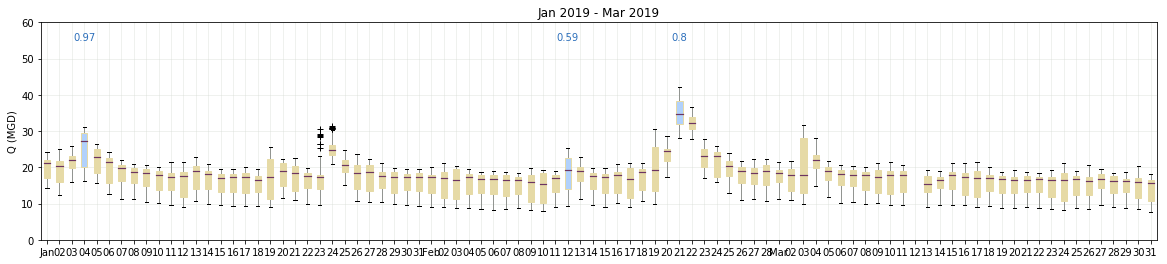

In [389]:
# create figure
fig,ax = plt.subplots(figsize=(20,4))
# plot
bp = ax.boxplot(df.values,
                labels=df2['label'],
               sym='+',
               patch_artist=True)

# defaults are weekday colors - xkcd:charcoal for whiskers and fliers, beige for dry weather
plt.setp(bp['boxes'],color='xkcd:beige')
plt.setp(bp['whiskers'],color='xkcd:grey')
plt.setp(bp['fliers'],color='xkcd:grey')
plt.setp(bp['medians'],color='xkcd:grape',linewidth=1.2)

# add light grid
ax.yaxis.grid(True,linestyle='-',
              which='major',
              color='xkcd:light grey',
              alpha=0.5)
ax.xaxis.grid(True,linestyle='-',
              which='major',
              color='xkcd:light grey',
              alpha=0.5)
ax.set_ylabel('Q (MGD)')
top = round(1.1*dfAll.max().max())
ax.set_ylim(0, top)
ax.set_title(str(startDate.strftime('%b %Y'))+ ' - ' 
             + str(endDate.strftime('%b %Y')))

# color for rain
count = 0
for box in bp['boxes']:
    if count in rainIndx:
        box.set_facecolor(color='xkcd:powder blue')
    count +=1
    
# add rain labels

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)

numBoxes = len(df2.label)
pos = np.arange(numBoxes) + 1
# get the rain values
upperLabels = rain
w = ['semibold']
count = 0
for tick, label in zip(range(numBoxes), ax.get_xticklabels()):
    if count in rainIndx:
        ax.text(pos[tick], top - (top*0.08), upperLabels[tick],
             horizontalalignment='center', size='medium',
             color='xkcd:medium blue')
    count+=1

import matplotlib as mpl
mpl.rcParams.update({'font.size' : 10})


saveName = homeDir + '\\Big Creek\\BC70A\\BC70A_' + str(startDate.date()) + '-' + str(endDate.date()) + '.png'
plt.savefig(saveName)

plt.show()

In [409]:
locs = ax.get_xticks()
labels = df.label


In [413]:
df2['dayofweek'] = df2['original'].dt.weekday
df2.head()

,original,label,dayonly,rain,dayofweek
0,2019-01-01,Jan,1,0.18,1
1,2019-01-02,02,2,0.28,2
2,2019-01-03,03,3,0.36,3
3,2019-01-04,04,4,0.97,4
4,2019-01-05,05,5,0.00,5


In [415]:
locs
newlocs = locs[0:2:]
newlocs

array([1, 2])

In [417]:
ax.get_position

<bound method _AxesBase.get_position of <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B0971D0>>